In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import unixFunctionsMITgcm_final as fc
import pandas as pd

In [2]:
from mitgcm_python_master.grid import Grid

In [3]:
grid=Grid('/data/oceans_output/shelf/kaight/mitgcm/PAS_grid')

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


(-75.0, -70.0)

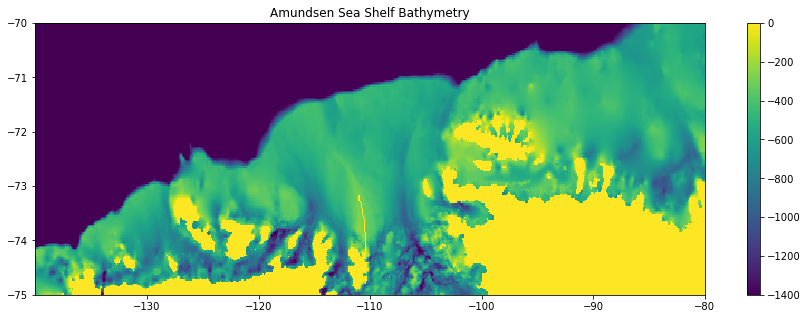

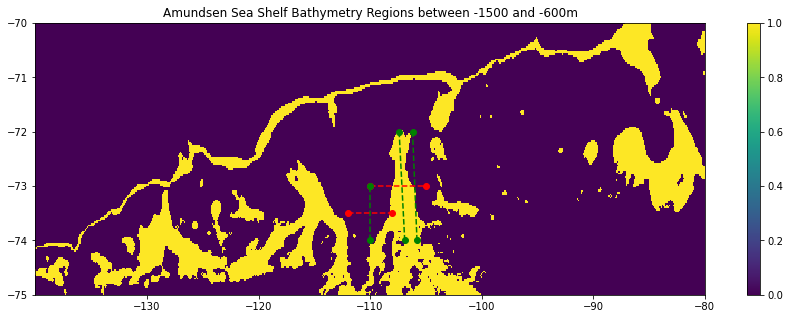

In [4]:
plt.figure(figsize=(15,5))
plt.title('Amundsen Sea Shelf Bathymetry')
img=plt.pcolor(grid.lon_2d, grid.lat_2d, grid.bathy, vmin=-1400)
plt.colorbar(img)
plt.ylim([-75, -70])
plt.figure(figsize=(15,5))
plt.title('Amundsen Sea Shelf Bathymetry Regions between -1500 and -600m')
img=plt.pcolor(grid.lon_2d, grid.lat_2d, (grid.bathy>=-1500)&(grid.bathy<=-600))


#PITE TROUGH
#Real:
#along:
x=[-106.9,-107.4]
y=[-74, -72]
plt.plot(x,y,'o--g')

#Optimized along
x=[-105.8,-106.2]
y=[-74, -72]
plt.plot(x,y,'o--g')
#cross:
x=[-110,-105]
y=[-73, -73]
plt.plot(x,y,'o--r')

#BEAR RIDGE
#along:
x=[-110,-110]
y=[-74, -73]
plt.plot(x,y,'o--g')
#cross:
x=[-112,-108]
y=[-73.5, -73.5]
plt.plot(x,y,'o--r')

#plt.plot(x,y,'o--g')
plt.colorbar(img)
plt.ylim([-75, -70])

In [14]:
#Load Data that we already have
#data={}
#data_dt={}

window=24

members=[0,13]#'all'

#var_list=['VVEL', 'VVELB']
var_list=['ADVy_THB']#'ADVy_TH']
filenames={'EXFuwind':'zonal_winds', 
           'THETA':'new2_amundsen_shelf_temp_200to700', 
           'UVEL':'depth_averaged_UVEL', 
           'VVEL':'depth_averaged_VVEL',
           'curlTAU':'curl_tau', 
           'THETAW106':'theta_W106', 
           'THETAW120':'theta_W120',
           'THETAW103-5':'theta_W103-5',
           'THETAW100':'theta_W100',
           'THETAS72-5':'theta_S72-5',
           'UVELB':'bottom100m_averaged_UVEL', 
           'VVELB':'bottom100m_averaged_VVEL', 
           'ADVy_TH':'depth_averaged_ADVy_TH',
           'ADVy_THB':'bottom100m_averaged_ADVy_TH'}

for var in var_list: 
    print('Starting with: '+var)
    data[var]=fc.loadMITgcmData(filename=filenames[var], members=members)
#     if 'VELB' in var:
#         if 'U' in var:
#             data[var]=data[var]-data['UVEL']
#             data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'UVEL', window=window)
#         elif 'VVEL' in var:
#             data[var]=data[var]-data['VVEL']
#             data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'VVEL', window=window)
#     elif 'THETA' in var:
#         data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], 'THETA', window=window)
#     else:
#         data_dt[var]=fc.detrend_and_average_MITgcmData(data[var], var, window=window)
    


Starting with: ADVy_THB
Loading number:0
Loading number:1
Loading number:2
Loading number:3
Loading number:4
Loading number:5
Loading number:6
Loading number:7
Loading number:8
Loading number:9
Loading number:10
Loading number:11
Loading number:12


NameError: name 'data_var' is not defined

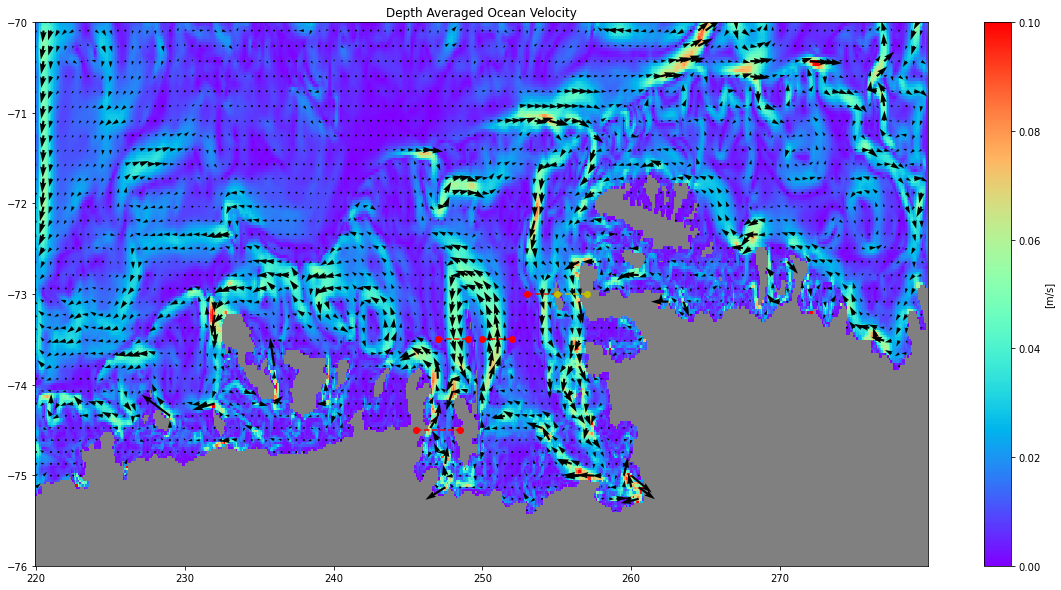

In [16]:
plt.figure(figsize=(20,10))
ax=plt.subplot(1,1,1)

var='UVEL'
var1='UVEL'
var2='VVEL'
vfield=np.sqrt(data[var1][var1].mean(dim='time').mean(dim='ens').values**2
               +data[var2][var2].mean(dim='time').mean(dim='ens').values**2)

xcor=[m for m in data[var1][var1].coords if 'X' in m][0]
ycor=[m for m in data[var1][var1].coords if 'Y' in m][0]

img=ax.pcolor(data[var1][var1][xcor], data[var1][var1][ycor], vfield, cmap='rainbow', vmax=0.1)
plt.colorbar(img, label='[m/s]', ax=ax)
ax.set_facecolor('grey')
step=5
ax.quiver(data[var][var1][xcor][::step], data[var][var1][ycor][::step], 
               data[var1]['UVEL'].mean(dim='time').mean(dim='ens').values[::step, ::step], 
               data[var2]['VVEL'].mean(dim='time').mean(dim='ens').values[::step, ::step], 
               color='black')

ax.set_ylim([-76, -70])
ax.set_title('Depth Averaged Ocean Velocity')


# #PITE TROUGH
# #Real:
# #along:
# x=[360-106.9,360-107.4]
# y=[-74, -72]
# plt.plot(x,y,'o--g')

# #Optimized along
# x=[360-105.8,360-106.2]
# y=[-74, -72]
# plt.plot(x,y,'o--g')
# #cross:
# x=[360-109,360-105]
# y=[-73, -73]
# plt.plot(x,y,'o--r')

# #BEAR RIDGE
# #along:
# x=[360-110,360-110]
# y=[-74, -73]
# plt.plot(x,y,'o--g')
# #cross:
# x=[360-112,360-108]
# y=[-73.5, -73.5]
# plt.plot(x,y,'o--r')

#Charactising the influx:
#PITE
x=[360-107,360-105]
y=[-73, -73]
plt.plot(x,y,'o--r')

x=[360-105,360-103]
y=[-73, -73]
plt.plot(x,y,'o--y')

#BEAR RIDGE EAST:
#cross:
x=[360-110,360-108]
y=[-73.5, -73.5]
plt.plot(x,y,'o--r')

#BEAR RIDGE WEST:
#cross:
x=[360-113,360-111]
y=[-73.5, -73.5]
plt.plot(x,y,'o--r')

#DOTSON:
#cross:
x=[360-114.5,360-111.5]
y=[-74.5, -74.5]
plt.plot(x,y,'o--r')

In [16]:
troughs={'PITE':[360-107, 360-105, -73],
         'Burke':[360-105,360-103,-73], 
         'BRE':[360-110,360-108, -73.5], 
         'BRW':[360-113,360-111, -73.5], 
         'Dotson':[360-114.5,360-111.5, -74.5]}



def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
            
flow={}
flowb={}
for trough in troughs:
#     ynew=find_nearest(data_dt['VVEL'].YG.to_numpy(), troughs[trough][-1])
#     flow[trough]=data_dt['VVEL'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)
#     flowb[trough]=data_dt['VVELB'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)
    
#     ynew=find_nearest(data['VVEL'].YG.to_numpy(), troughs[trough][-1])
#     flow[trough]=data['VVEL'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)
#     flowb[trough]=data['VVELB'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)

    ynew=find_nearest(data['ADVy_TH'].YG.to_numpy(), troughs[trough][-1])
    flow[trough]=data['ADVy_TH'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)
    flowb[trough]=data['ADVy_THB'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC')#, skipna=True)


time=flow[trough].indexes['time'].to_datetimeindex()

/tmp/ipykernel_70192/1289442659.py:30: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time=flow[trough].indexes['time'].to_datetimeindex()


In [28]:
#SAVE EVERYTHING
for trough in troughs:
    flow[trough].to_netcdf('./data/'+trough+'_depth_averaged_advy_full.nc')
    #flowb[trough].to_netcdf('./data/'+trough+'_bottom100m_adv_full.nc')
    

/tmp/ipykernel_36103/2651018357.py:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r')
/tmp/ipykernel_36103/2651018357.py:6: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flowb[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom Flow', c='orange')
/tmp/ipykernel_36103/2651018357.py:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r')
/tmp/ipykernel_36103/2651018357.py:6: DeprecationWarning: Reductions are appl

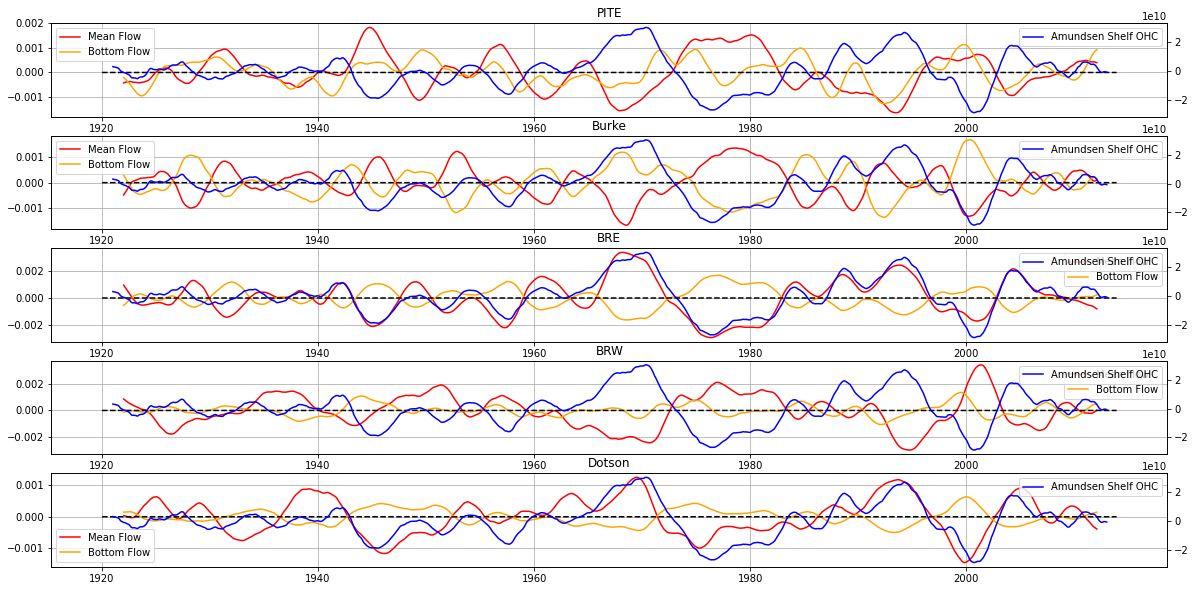

In [99]:
plt.figure(figsize=(20,10))

for i, name in enumerate(flow):
    plt.subplot(len(flow), 1, i+1)
    plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r')
    plt.plot(time, flowb[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom Flow', c='orange')
    plt.plot(time, np.zeros(len(time)), '--k')
    plt.legend()
    plt.grid(True)
    plt.twinx()
    plt.plot(time, (total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean()-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    plt.title(name)
    plt.legend()

/tmp/ipykernel_39851/597898277.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time=flow[trough].sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex()
/tmp/ipykernel_39851/597898277.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time2=flow[trough].sel(time=slice('1910', '2013')).indexes['time'].to_datetimeindex()
/tmp/ipykernel_39851/597898277.py:11: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  a=pd.Series((flowb[name]['VVEL']-flow[name]

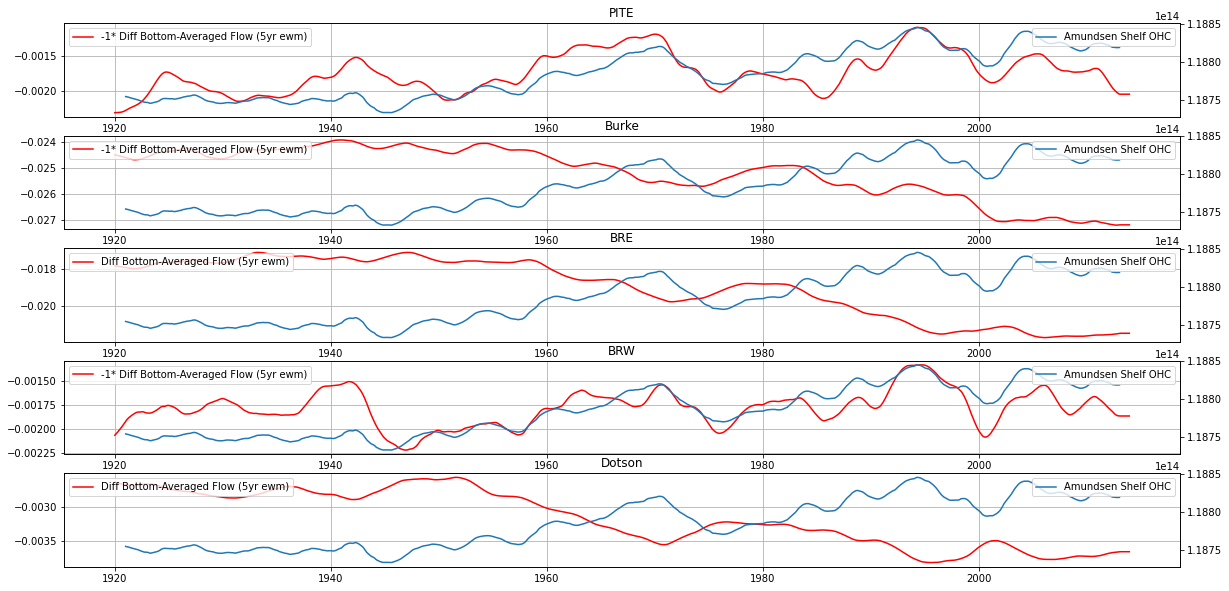

In [53]:
#VELOCITY
plt.figure(figsize=(20,10))

time=flow[trough].sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex()
for i, name in enumerate(flow):
    plt.subplot(len(flow), 1, i+1)
#     if name in ['PITE', 'Burke', 'BRW']:
#         plt.plot(time, (-1*(flowb[name]['VVEL']-flow[name]['VVEL']).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Diff Bottom-Averaged Flow', c='r')
#     else:
#         plt.plot(time, (flowb[name]['VVEL']-flow[name]['VVEL']).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Diff Bottom-Averaged Flow', c='r')
    time2=flow[trough].sel(time=slice('1910', '2013')).indexes['time'].to_datetimeindex()
    a=pd.Series((flowb[name]['VVEL']-flow[name]['VVEL']).sel(time=slice('1910', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens').values, index=time2).ewm(5*12).mean()['1920':'2013']
    if name in ['PITE', 'Burke', 'BRW']:
    
        plt.plot(time, (-1*a)
                 , label='-1* Diff Bottom-Averaged Flow (5yr ewm)', c='r')
    else:
        plt.plot(time, a, label='Diff Bottom-Averaged Flow (5yr ewm)', c='r')

        
#     if name in ['PITE', 'Burke', 'BRW']:
#         plt.plot(time, (-1*flowb[name]['VVEL'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Bottom Flow', c='r')
#     else:
#         plt.plot(time, flowb[name]['VVEL'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom Flow', c='r')
#     if name in ['PITE', 'Burke', 'BRW']:
#         plt.plot(time, (-1*flow[name]['VVEL'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Mean Flow', c='r')
#     else:
#         plt.plot(time, flow[name]['VVEL'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r')

    
    #plt.plot(time, flowb[name]['VVEL'].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom Flow', c='orange')
    #plt.plot(time, np.zeros(len(time)), '--k')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.twinx()
    plt.plot(total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean(), label='Amundsen Shelf OHC')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    #plt.plot(total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).ewm(5*12).mean()['1920':'2013'].rolling(24, center=True).mean(), label='Shelf Break Wind (5 yr ewm)')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    #plt.plot(total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean(), label='Shelf Break Wind')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    
    plt.title(name)
    plt.legend(loc='upper right')

/tmp/ipykernel_70192/2281828650.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time=flow[trough].sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex()
/tmp/ipykernel_70192/2281828650.py:8: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, (-1*(flowb[name]['ADVy_TH']-flow[name]['ADVy_TH'].sel(ens=slice(0,13))).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Diff Bottom-Averaged ADVy', c='r')
/tmp/ipykernel_70192/2281828650.py:8: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot

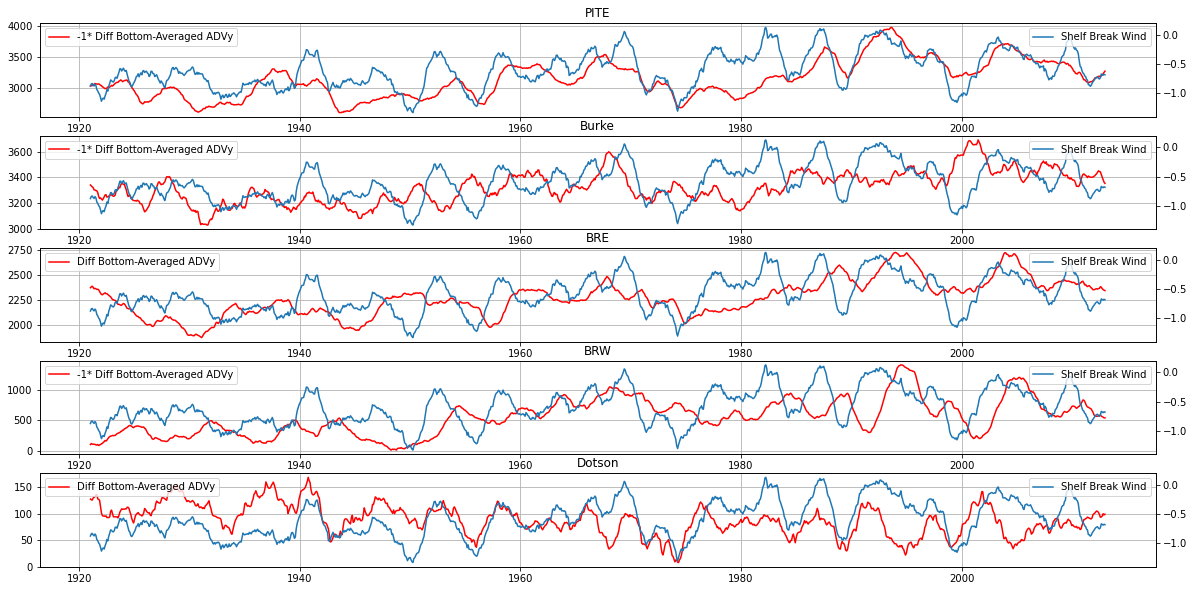

In [60]:
#HEAT ADVECTION
plt.figure(figsize=(20,10))

time=flow[trough].sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex()
for i, name in enumerate(flow):
    plt.subplot(len(flow), 1, i+1)
    if name in ['PITE', 'Burke', 'BRW']:
        plt.plot(time, (-1*(flowb[name]['ADVy_TH']-flow[name]['ADVy_TH'].sel(ens=slice(0,13))).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Diff Bottom-Averaged ADVy', c='r')
    else:
        plt.plot(time, (flowb[name]['ADVy_TH']-flow[name]['ADVy_TH'].sel(ens=slice(0,13))).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Diff Bottom-Averaged ADVy', c='r')

#     time2=flow[trough].sel(time=slice('1910', '2013')).indexes['time'].to_datetimeindex()
#     a=pd.Series((flowb[name]['VVEL']-flow[name]['VVEL']).sel(time=slice('1910', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens').values, index=time2).ewm(5*12).mean()['1920':'2013']
#     if name in ['PITE', 'Burke', 'BRW']:
    
#         plt.plot(time, (-1*a)
#                  , label='-1* Diff Bottom-Averaged Flow (5yr ewm)', c='r')
#     else:
#         plt.plot(time, a, label='Diff Bottom-Averaged Flow (5yr ewm)', c='r')

        
#     if name in ['PITE', 'Burke', 'BRW']:
#         plt.plot(time, (-1*flowb[name]['ADVy_TH'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Bottom ADVy', c='r')
#     else:
#         plt.plot(time, flowb[name]['ADVy_TH'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom ADVy', c='r')

#     if name in ['PITE', 'Burke', 'BRW']:
#         plt.plot(time, (-1*flow[name]['ADVy_TH'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens')), label='-1* Mean ADVy', c='r')
#     else:
#         plt.plot(time, flow[name]['ADVy_TH'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean ADVy', c='r')

    
    #plt.plot(time, flowb[name]['VVEL'].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Bottom Flow', c='orange')
    #plt.plot(time, np.zeros(len(time)), '--k')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.twinx()
    #plt.plot(total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'][['ens'+str(i).zfill(2) for i in range(1,14)]].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean(), label='Amundsen Shelf OHC')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    #plt.plot(total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).ewm(5*12).mean()['1920':'2013'].rolling(24, center=True).mean(), label='Shelf Break Wind (5 yr ewm)')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    plt.plot(total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean(), label='Shelf Break Wind')#-total['amundsen_shelf_ohc_below_0m'].mean(axis=1)['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()), c='b', label='Amundsen Shelf OHC')
    
    plt.title(name)
    plt.legend(loc='upper right')

/tmp/ipykernel_36103/1138169399.py:4: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
/tmp/ipykernel_36103/1138169399.py:6: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)
/tmp/ipykernel_36103/1138169399.py:6: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)
/tmp/ipykernel_36103/1138169399.py:6: DeprecationWarning: Reductions are appli

(3652.0, 10957.0)

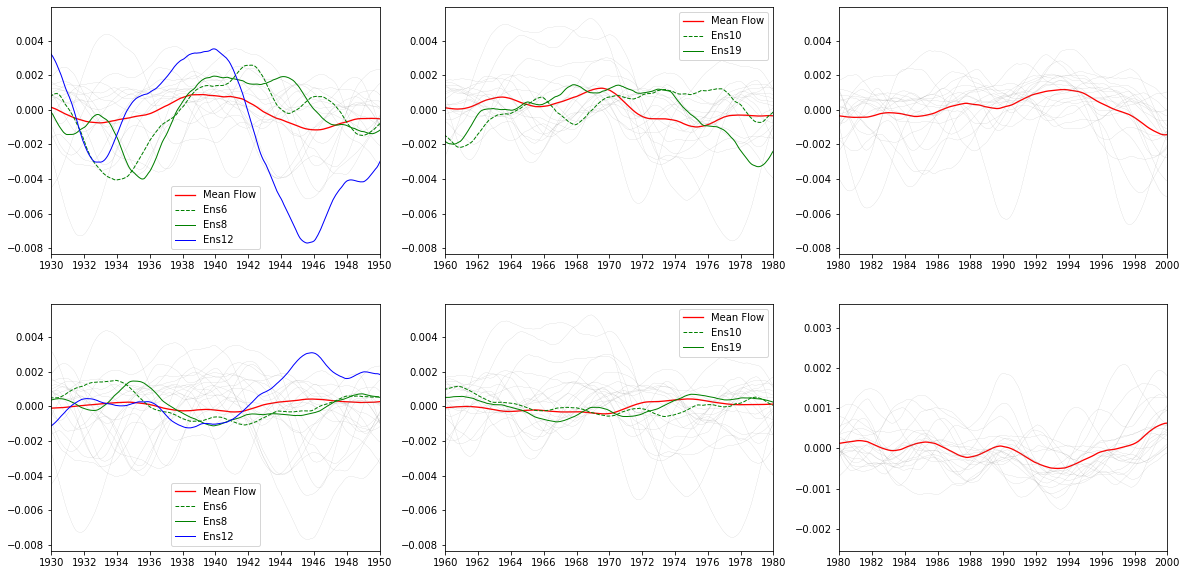

In [164]:
name='Dotson'
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)

plt.plot(time, flow[name].sel(ens=5).rolling(time=24, center=True).mean(dim='time'), '--g', linewidth=1, label='Ens6')
plt.plot(time, flow[name].sel(ens=7).rolling(time=24, center=True).mean(dim='time'), c='green', linewidth=1, label='Ens8')
plt.plot(time, flow[name].sel(ens=11).rolling(time=24, center=True).mean(dim='time'), c='blue', linewidth=1, label='Ens12')
plt.xlim([pd.to_datetime('1930'), pd.to_datetime('1950')])
plt.legend()


plt.subplot(2,3,2)
plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)

plt.plot(time, flow[name].sel(ens=9).rolling(time=24, center=True).mean(dim='time'), '--g', linewidth=1, label='Ens10')
plt.plot(time, flow[name].sel(ens=18).rolling(time=24, center=True).mean(dim='time'), c='green', linewidth=1, label='Ens19')    
plt.xlim([pd.to_datetime('1960'), pd.to_datetime('1980')])
plt.legend()

plt.subplot(2,3,3)
plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)
plt.xlim([pd.to_datetime('1980'), pd.to_datetime('2000')])



plt.subplot(2,3,4)
plt.plot(time, flowb[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)

plt.plot(time, flowb[name].sel(ens=5).rolling(time=24, center=True).mean(dim='time'), '--g', linewidth=1, label='Ens6')
plt.plot(time, flowb[name].sel(ens=7).rolling(time=24, center=True).mean(dim='time'), c='green', linewidth=1, label='Ens8')
plt.plot(time, flowb[name].sel(ens=11).rolling(time=24, center=True).mean(dim='time'), c='blue', linewidth=1, label='Ens12')
plt.xlim([pd.to_datetime('1930'), pd.to_datetime('1950')])
plt.legend()


plt.subplot(2,3,5)
plt.plot(time, flowb[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)

plt.plot(time, flowb[name].sel(ens=9).rolling(time=24, center=True).mean(dim='time'), '--g', linewidth=1, label='Ens10')
plt.plot(time, flowb[name].sel(ens=18).rolling(time=24, center=True).mean(dim='time'), c='green', linewidth=1, label='Ens19')    
plt.xlim([pd.to_datetime('1960'), pd.to_datetime('1980')])
plt.legend()

plt.subplot(2,3,6)
plt.plot(time, flowb[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flowb[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)
plt.xlim([pd.to_datetime('1980'), pd.to_datetime('2000')])

/tmp/ipykernel_36103/3187103494.py:21: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='k', linewidth=1.3)
/tmp/ipykernel_36103/3187103494.py:22: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].sel(ens=select).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Convection (1940-1945) Mean', c='b', linewidth=1.3)
/tmp/ipykernel_36103/3187103494.py:23: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, flow[name].sel(ens=nselect).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='No Convection (1940-

Text(0.5, 1.0, 'Depth Averaged Meridional Flow through PITE\nSelecting lines based on omitting all lines with convection between 1940-1945')

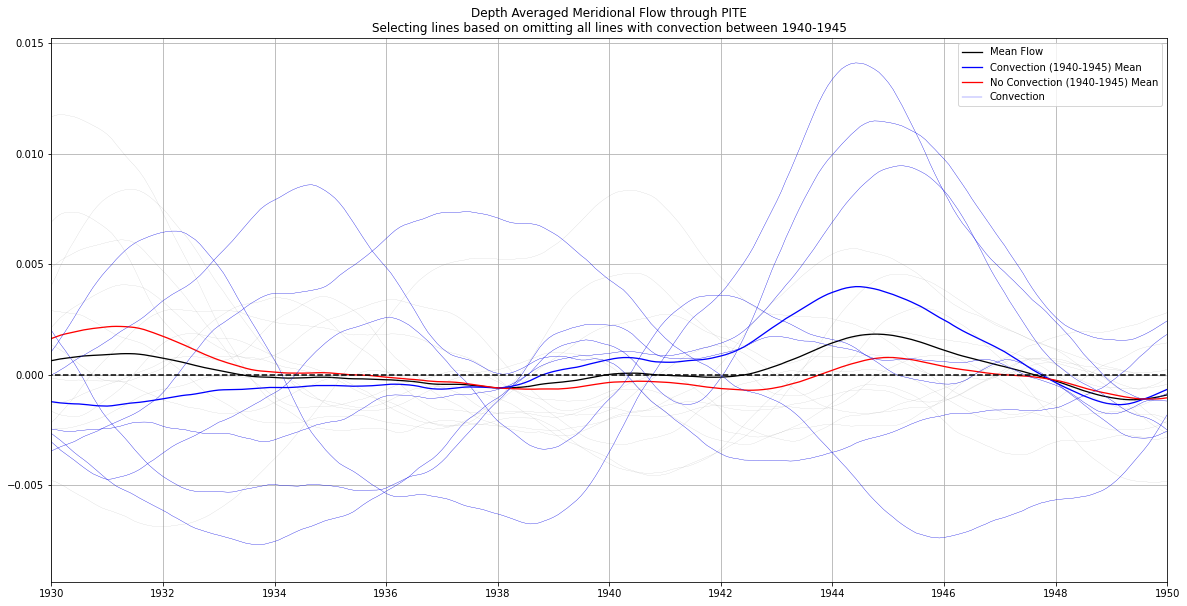

In [155]:
choose='full'

if choose=='full':
    title='Selecting lines based on omitting all lines with convection between 1940-1945'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='Selecting lines based on PIB convection (1939-1942)'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-440 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
    
convection = convection.reindex(sorted(convection.columns), axis=1)
select=np.where(convection['1940':'1945'].sum()!=0)[0]
nselect=np.where(convection['1940':'1945'].sum()==0)[0]
    
name='PITE'
plt.figure(figsize=(20,10))
#plt.subplot(2,3,1)
plt.plot(time, flow[name].rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Mean Flow', c='k', linewidth=1.3)
plt.plot(time, flow[name].sel(ens=select).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='Convection (1940-1945) Mean', c='b', linewidth=1.3)
plt.plot(time, flow[name].sel(ens=nselect).rolling(time=24, center=True).mean(dim='time').mean(dim='ens'), label='No Convection (1940-1945) Mean', c='r', linewidth=1.3)
for ens in flow[name].ens:
    plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='grey', linewidth=0.1)
for ens in select:
    if ens==select[0]:
        plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='blue', label='Convection', linewidth=0.3)
    else:
        plt.plot(time, flow[name].sel(ens=ens).rolling(time=24, center=True).mean(dim='time'), c='blue', linewidth=0.3)

plt.plot(time, np.zeros(len(time)), '--k')
plt.grid(True)
plt.xlim([pd.to_datetime('1930'), pd.to_datetime('1950')])
plt.legend()
plt.title('Depth Averaged Meridional Flow through '+name+'\n'+title)


In [86]:
total['dotson_to_cosgrove_massloss'][['ens01', 'ens02']]

ens01       ens02
1890-01-01  121.612136  123.205775
1890-02-01  178.888761  178.873602
1890-03-01  173.753214  174.514517
1890-04-01  155.928243  165.805901
1890-05-01  152.431618  162.638544
...                ...         ...
2013-08-01  189.285623  216.908654
2013-09-01  189.112440  221.689798
2013-10-01  188.294842  206.910368
2013-11-01  177.592374  196.589498
2013-12-01  172.370649  171.400646

[1488 rows x 2 columns]

In [6]:
#Reading the data.
full='/data/hpcdata/users/grejan/mitgcm/data'
total={}
units={}
longnames={}
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='isotherm')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='final')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='ohc')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='trough')

/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:437: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  total[var]=pd.DataFrame(data=ts.values.T, columns=names, index=ts.indexes['time'].to_datetimeindex())
/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:445: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  total[varb]=pd.DataFrame(data=ts.values.T, columns=names, index=ts.indexes['time'].to_datetimeindex())
/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:453: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standa

In [44]:
a=flow[name].values
len(a)

1

In [55]:
data_dt['VVEL'].sel(XC=slice(troughs[trough][0], troughs[trough][1]), YG=ynew).mean(dim='XC', skipna=True).values[0][50:60]

array([0.00262501, 0.00261281, 0.00256741, 0.00235294, 0.00269534,
       0.00265307, 0.00255928, 0.00217284, 0.00149889, 0.00125868])

<AxesSubplot:>

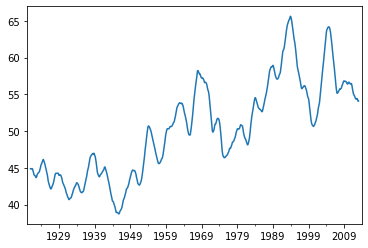

In [158]:
total['dotson_massloss'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean().plot()

<AxesSubplot:>

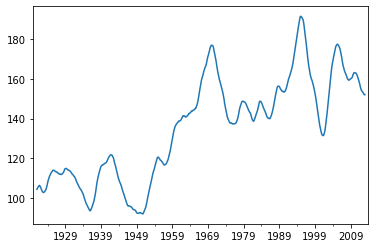

In [159]:
total['getz_massloss'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean().plot()

<AxesSubplot:>

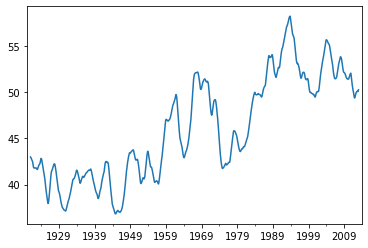

In [160]:
total['pig_massloss'].mean(axis=1)['1920':'2013'].rolling(24, center=True).mean().plot()

In [130]:
select

array([ 0,  1,  6, 10, 11, 12, 14])

In [60]:
data[var][var]

<xarray.DataArray 'UVEL' (ens: 20, time: 1488, YC: 384, XG: 600)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.02422704, 0.02356711, 0.0225182 , ..., 0.02136925,
          0.02057832, 0.01969547],
         [0.01812295, 0.01793086, 0.02167401, ..., 0.02426884,
          0.02407138, 0.02473745],
         [0.01469095, 0.01487912, 0.02674226, ..., 0.01853321,
          0.01894587, 0.02631162]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [0.03457047, 0.03416199, 0.03561695, ..., 0.03463879,
          0.03561175, 0.03411683],
         [0.03215488, 0.03201681, 0.03850429, ..., 0.03345904,
          0.03428729, 0.03107835],
         [0.02943797, 0.02968661, 0.03507248, ..., 0.03291418,
          0.03222484, 0.02788041]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.04393239, 0.04324178, 0.0432767 , ..., 0.01711824,
          0.01792131, 0.01745845],
         [0.03504928, 0.03484636, 0.04108443, ..., 0.01566617,
          0.01647455, 0.0154308 ],
         [0.0263532 , 0.02661159, 0.04389021, ..., 0.01660903,
          0.01601031, 0.01264383]]]])
Coordinates:
  * time     (time) object 1890-02-01 00:00:00 ... 2014-01-01 00:00:00
  * YC       (YC) float32 -75.64 -75.61 -75.59 -75.56 ... -62.48 -62.44 -62.39
  * XG       (XG) float32 220.0 220.1 220.2 220.3 ... 279.6 279.7 279.8 279.9
Dimensions without coordinates: ens

In [ ]:
from mitgcm_python_master.plot_slices import read_plot_slice

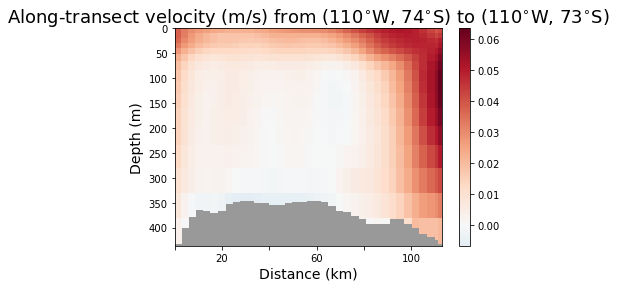

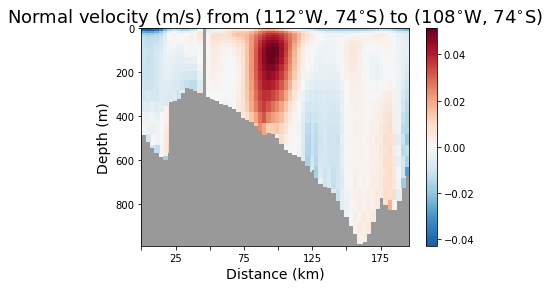

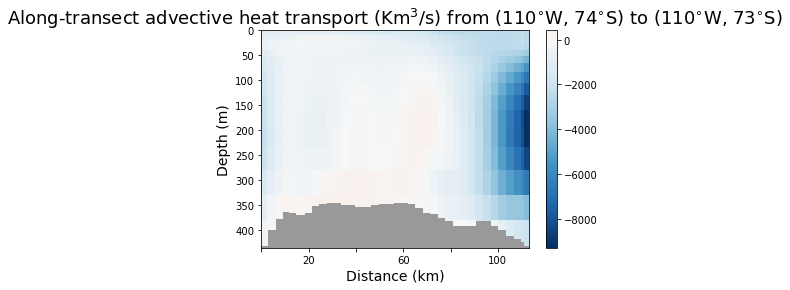

In [54]:
#BEAR RIDGE
read_plot_slice (var='valong', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(-110.1, -74), point1=(-110, -73), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)

#Cross
x=[-112,-108]
y=[-73.55, -73.5]
read_plot_slice (var='vnorm', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)


#BEAR RIDGE
read_plot_slice (var='tadv_along', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(-110.1, -74), point1=(-110, -73), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)


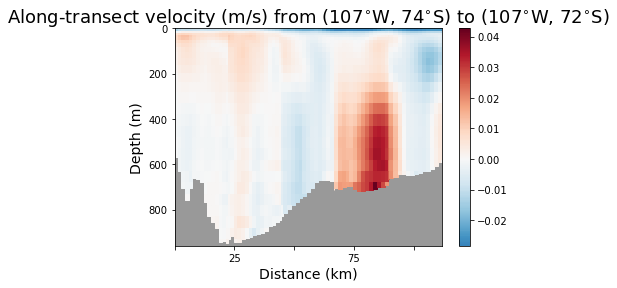

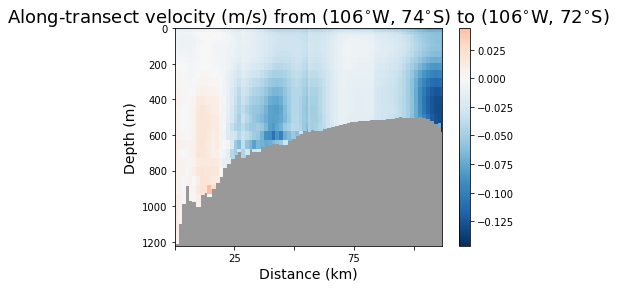

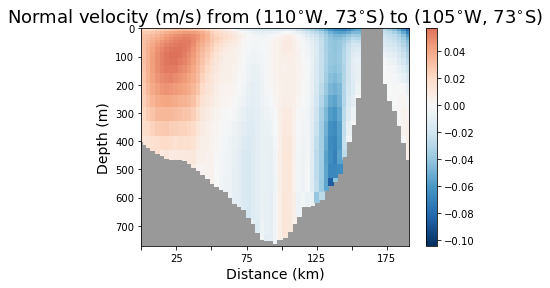

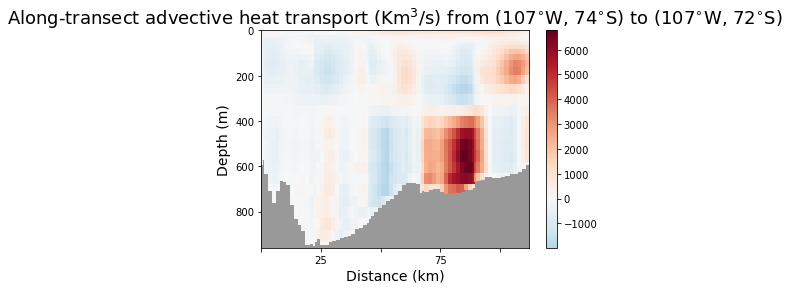

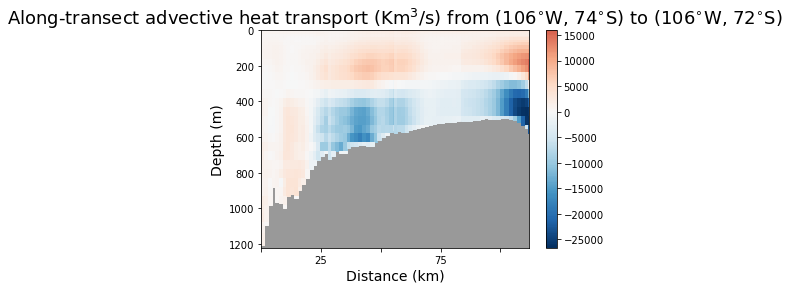

In [55]:
#PITE
#Real
x=[-106.9,-107.4]
y=[-74, -72]
read_plot_slice (var='valong', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)
#Optimized
x=[-105.8,-106.2]
y=[-74, -72]
read_plot_slice (var='valong', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)

#Cross
x=[-110,-105]
y=[-73.1, -73]
read_plot_slice (var='vnorm', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)

#Real
x=[-106.9,-107.4]
y=[-74, -72]
read_plot_slice (var='tadv_along', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)
#Optimized
x=[-105.8,-106.2]
y=[-74, -72]
read_plot_slice (var='tadv_along', file_path='/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE06/output/194101/MITgcm/output.nc',
                 grid=None, lon0=None, lat0=None, point0=(x[0], y[0]), point1=(x[-1], y[-1]), time_index=None, t_start=None, t_end=None, time_average=True, hmin=None, hmax=None, zmin=None, zmax=None, vmin=None, vmax=None, contours=None, date_string=None, fig_name=None, second_file_path=None, eosType='MDJWF', rhoConst=None, Tref=None, Sref=None, tAlpha=None, sBeta=None, ref_depth=0)




In [22]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
np.shape(grid.lon_2d)

(384, 600)

/tmp/ipykernel_82732/1080577963.py:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ts=pd.DataFrame(data=ts.values.T, columns=ts.ens, index=ts.indexes['time'].to_datetimeindex())


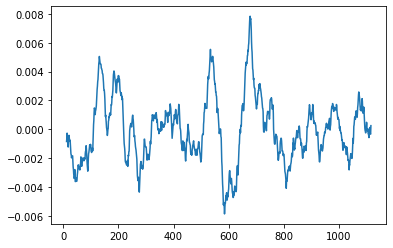

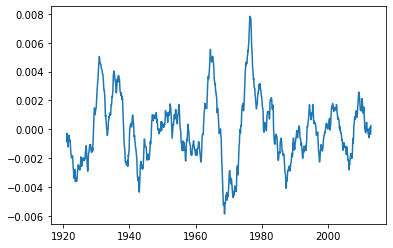

In [26]:
ts=xr.open_dataarray('./data/PITE_depth_averaged_vflow.nc')
ts=ts.drop('YG')
plt.figure()
plt.plot(ts.sel(ens=19).values)

ts=pd.DataFrame(data=ts.values.T, columns=ts.ens, index=ts.indexes['time'].to_datetimeindex())
#ts.to_dataframe().unstack().T.index[0][1]
# ts=ts.sel(ens=slice(0,2))
# ts
# #data_xr['time']=data_xr.indexes['time'].to_datetimeindex()
# #trough=data_xr['VVEL'].drop('YG').to_dataframe().unstack().T.droplevel(None)

# #trough.mean(axis=1).rolling(24, center=True).mean().plot()
plt.figure()
plt.plot(ts[19])

ens01    556
ens02    622
ens03    297
ens04    222
ens05     32
ens06    215
ens07    202
ens08    139
ens09    130
ens10    163
ens11    303
ens12    291
ens13    385
ens14    311
ens15    608
ens16    212
ens17    205
ens18    196
ens19    157
ens20     96
dtype: int64
Dotson


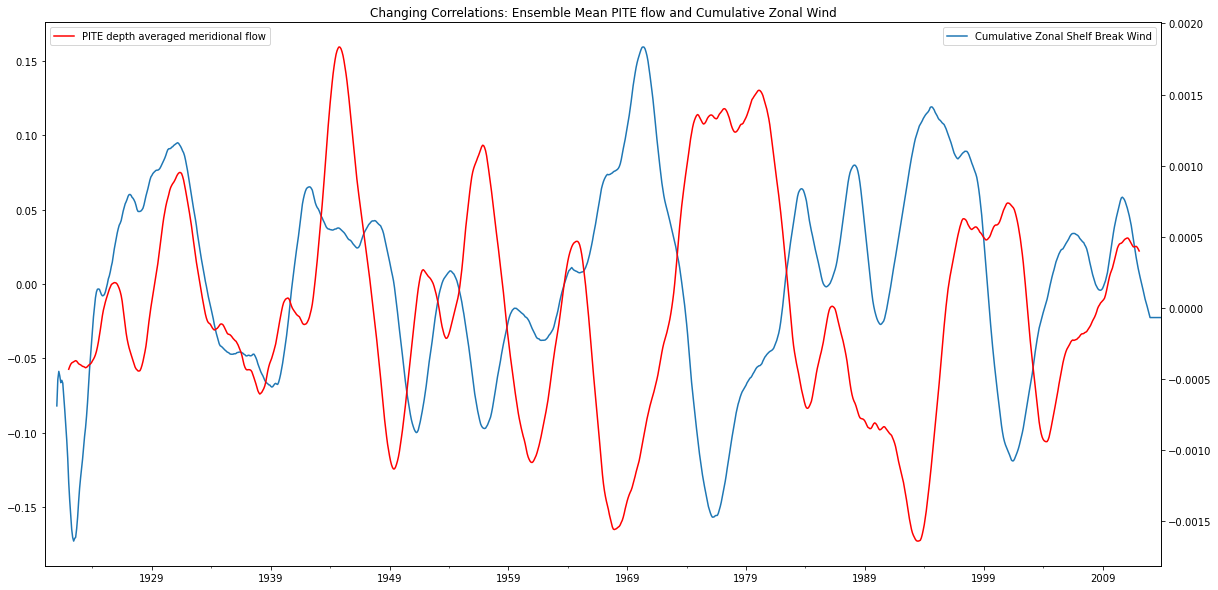

In [62]:
choose='only'

if choose=='full':
    title='Selecting lines based on omitting all lines with convection between 1940-1945'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='Selecting lines based on PIB convection (1939-1942)'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-440 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
    
convection = convection.reindex(sorted(convection.columns), axis=1)
#select=np.where(convection.sum()<=100)[0]
print((convection.sum(axis=0)))
#cselect=list(convection[(convection.sum(axis=0)<=100).index])
#nselect=np.where(convection.sum()<=100)[0]

#select=[4,19]
#cselect=['ens05', 'ens20']

plt.figure(figsize=(20,10))
plt.title('Changing Correlations: Ensemble Mean PITE flow and Cumulative Zonal Wind')
#wind=total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()
#wind.plot()

#wind=total['amundsen_shelf_break_uwind_avg']['1920':'2013'][cselect].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'][cselect].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()
wind=total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()

cumwind=wind.ewm(halflife=5*12).mean()
#cumwind=wind.cumsum()
cumwind.plot(label='Cumulative Zonal Shelf Break Wind')
plt.legend()
#(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()).cumsum().plot()
plt.twinx()
#trough[select].mean(axis=1).rolling(24, center=True).mean().plot(c='r', label='PITE depth averaged meridional flow')

print(trough)
total['PITE'].mean(axis=1).rolling(24, center=True).mean().plot(c='r', label='PITE depth averaged meridional flow')
plt.grid
plt.legend(loc='upper left')

# print('Correlation with zonal wind (shelf break)')
# print('Full')
# print(trough.mean(axis=1).rolling(24, center=True).mean().corr(wind))
# print('Until 1940')
# print(trough['1920':'1940'].mean(axis=1).rolling(24, center=True).mean().corr(wind))
# print('From 1940')
# print(trough['1950':].mean(axis=1).rolling(24, center=True).mean().corr(wind))


# print('Correlation with cumulative zonal wind (shelf break)')
# print('Full')
# print(trough.mean(axis=1).rolling(24, center=True).mean().corr(cumwind))
# print('Until 1950')
# print(trough['1920':'1950'].mean(axis=1).rolling(24, center=True).mean().corr(cumwind))
# print('From 1950')
# print(trough['1950':].mean(axis=1).rolling(24, center=True).mean().corr(cumwind))







AttributeError: 'str' object has no attribute 'rolling'

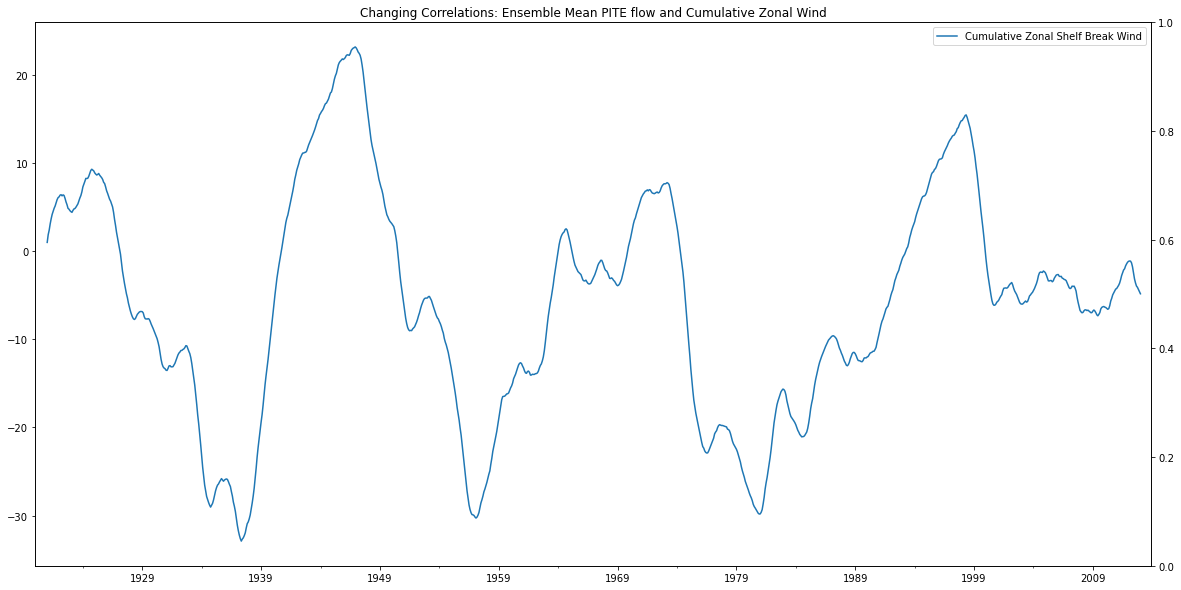

In [55]:
plt.figure(figsize=(20,10))
plt.title('Changing Correlations: Ensemble Mean PITE flow and Cumulative Zonal Wind')
wind=total['amundsen_shelf_break_uwind_avg']['1920':'2013'].rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].rolling(25*12, min_periods=5*12, center=True).mean()
#wind.plot()

cumwind=wind.cumsum()
cumwind['ens06'].plot(label='Cumulative Zonal Shelf Break Wind')
plt.legend()
#(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()).cumsum().plot()
plt.twinx()
trough[5].rolling(24, center=True).mean().plot(c='r', label='PITE depth averaged meridional flow')
plt.grid
plt.legend(loc='upper left')


print('Correlation with zonal wind (shelf break)')
print('Full')
print(trough[5].rolling(24, center=True).mean().corr(wind['ens06']))
print('Until 1940')
print(trough['1920':'1940'][5].rolling(24, center=True).mean().corr(wind['ens06']))
print('From 1940')
print(trough['1950':][5].rolling(24, center=True).mean().corr(wind['ens06']))


print('Correlation with cumulative zonal wind (shelf break)')
print('Full')
print(trough[5].rolling(24, center=True).mean().corr(cumwind['ens06']))
print('Until 1950')
print(trough['1920':'1950'][5].rolling(24, center=True).mean().corr(cumwind['ens06']))
print('From 1950')
print(trough['1950':][5].rolling(24, center=True).mean().corr(cumwind['ens06']))


<AxesSubplot:>

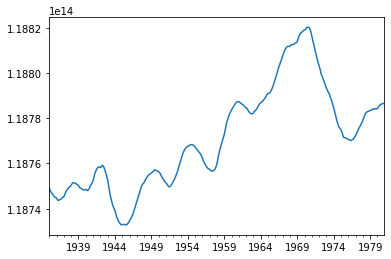

In [180]:
total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()['1935':'1980'].plot()

In [271]:
wind

1920-01-01 00:00:00  1920-02-01 00:00:00  1920-03-01 00:00:00  \
1920-01-01                  NaN                  NaN                  NaN   
1920-02-01                  NaN                  NaN                  NaN   
1920-03-01                  NaN                  NaN                  NaN   
1920-04-01                  NaN                  NaN                  NaN   
1920-05-01                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2013-08-01                  NaN                  NaN                  NaN   
2013-09-01                  NaN                  NaN                  NaN   
2013-10-01                  NaN                  NaN                  NaN   
2013-11-01                  NaN                  NaN                  NaN   
2013-12-01                  NaN                  NaN                  NaN   

            1920-04-01 00:00:00  1920-05-01 00:00:00  1920-06-01 00:00:00  \
1920-01-01                  NaN                  NaN                  NaN   
1920-02-01                  NaN                  NaN                  NaN   
1920-03-01                  NaN                  NaN                  NaN   
1920-04-01                  NaN                  NaN                  NaN   
1920-05-01                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2013-08-01                  NaN                  NaN                  NaN   
2013-09-01                  NaN                  NaN                  NaN   
2013-10-01                  NaN                  NaN                  NaN   
2013-11-01                  NaN                  NaN                  NaN   
2013-12-01                  NaN                  NaN                  NaN   

            1920-07-01 00:00:00  1920-08-01 00:00:00  1920-09-01 00:00:00  \
1920-01-01                  NaN                  NaN                  NaN   
1920-02-01                  NaN                  NaN                  NaN   
1920-03-01                  NaN                  NaN                  NaN   
1920-04-01                  NaN                  NaN                  NaN   
1920-05-01                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2013-08-01                  NaN                  NaN                  NaN   
2013-09-01                  NaN                  NaN                  NaN   
2013-10-01                  NaN                  NaN                  NaN   
2013-11-01                  NaN                  NaN                  NaN   
2013-12-01                  NaN                  NaN                  NaN   

            1920-10-01 00:00:00  ...  ens11  ens12  ens13  ens14  ens15  \
1920-01-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
1920-02-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
1920-03-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
1920-04-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
1920-05-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
...                         ...  ...    ...    ...    ...    ...    ...   
2013-08-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
2013-09-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
2013-10-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
2013-11-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   
2013-12-01                  NaN  ...    NaN    NaN    NaN    NaN    NaN   

            ens16  ens17  ens18  ens19  ens20  
1920-01-01    NaN    NaN    NaN    NaN    NaN  
1920-02-01    NaN    NaN    NaN    NaN    NaN  
1920-03-01    NaN    NaN    NaN    NaN    NaN  
1920-04-01    NaN    NaN    NaN    NaN    NaN  
1920-05-01    NaN    NaN    NaN    NaN    NaN  
...           ...    ...    ...    ...    ...  


In [274]:
wind=total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()


<AxesSubplot:>

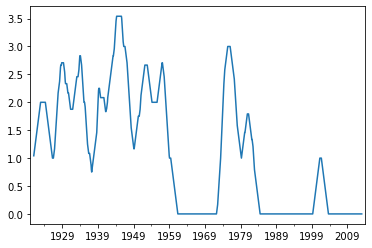

In [288]:
convection['1920':'2013'].astype(int).sum(axis=1).rolling(2*12, center=True).mean().plot()

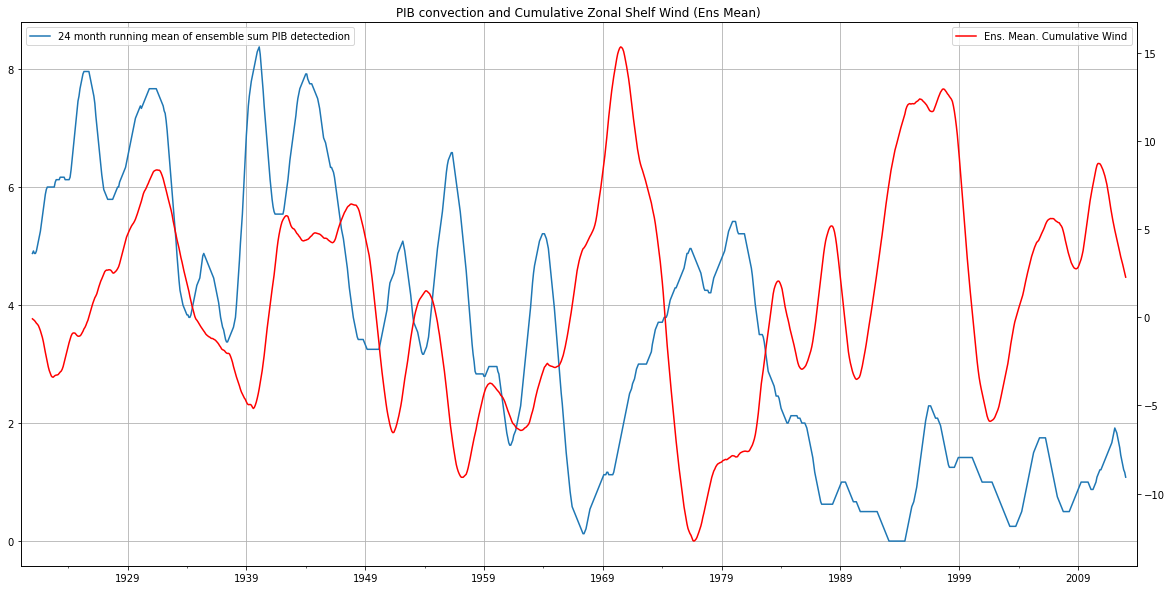

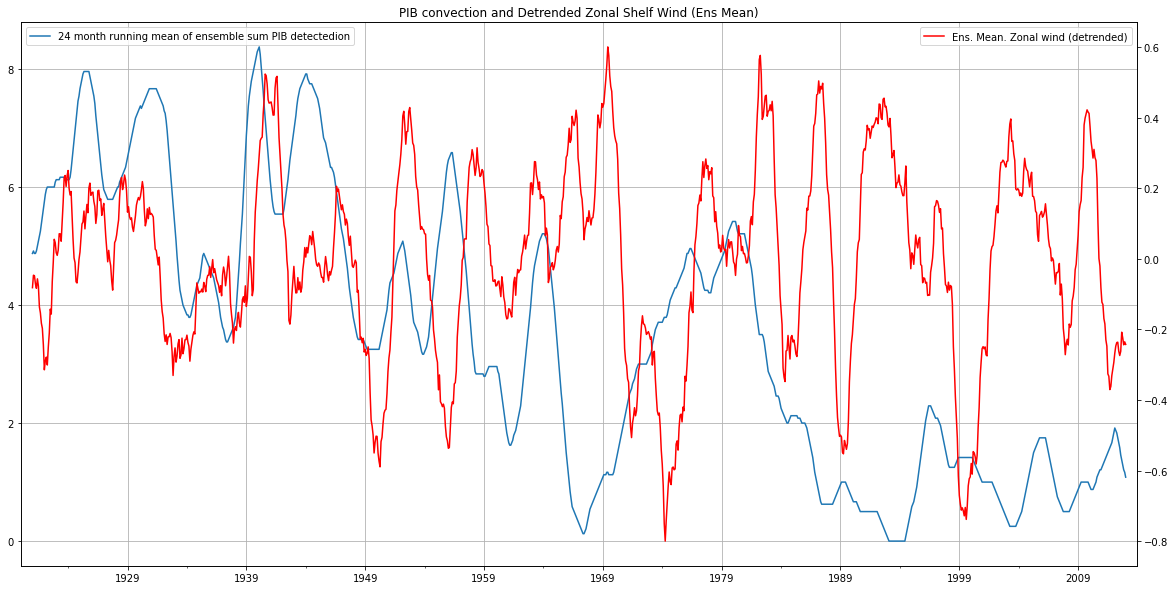

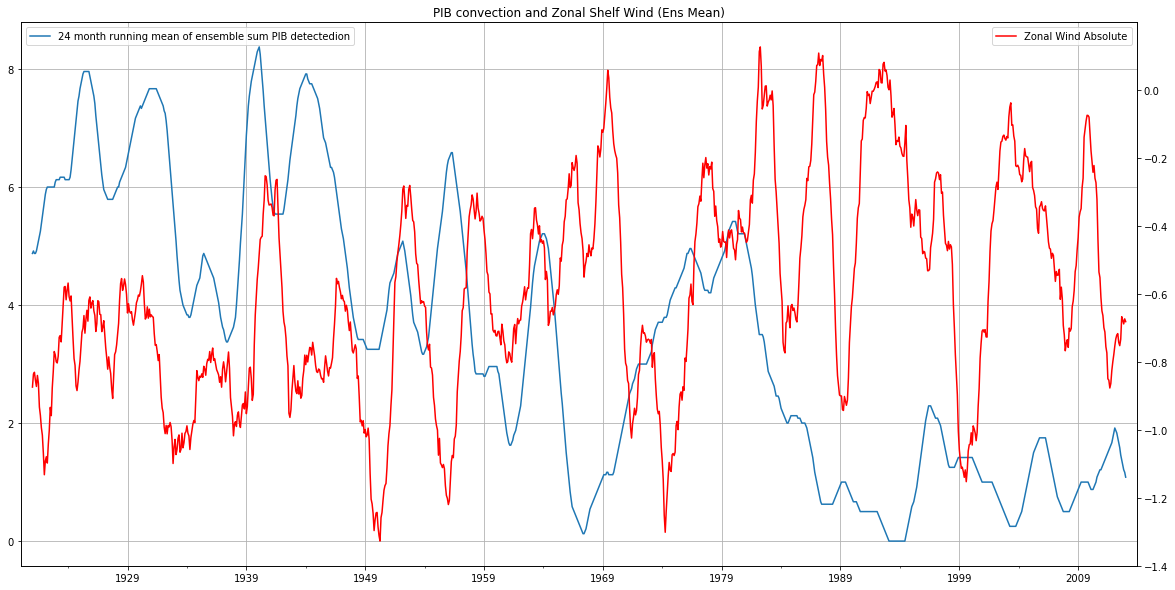

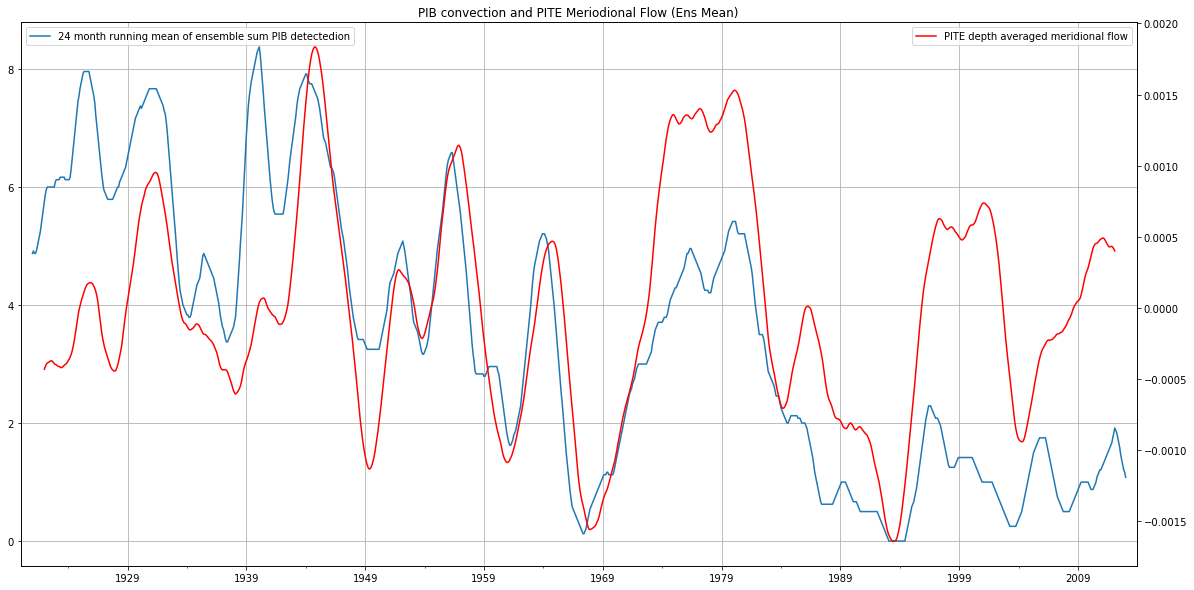

In [309]:
choose='only'

if choose=='full':
    title='Selecting lines based on omitting all lines with convection between 1940-1945'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='Selecting lines based on PIB convection (1939-1942)'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-440 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
    

plt.figure(figsize=(20,10))
plt.title('PIB convection and Cumulative Zonal Shelf Wind (Ens Mean)')
convection['1920':'2013'].astype(int).sum(axis=1).rolling(12*2, center=True).mean().plot(label='24 month running mean of ensemble sum PIB detectedion')
plt.grid(True)
plt.legend(loc='upper left')
plt.twinx()
cumwind.mean(axis=1).plot(c='red', label='Ens. Mean. Cumulative Wind')
plt.legend(loc='upper right')

plt.figure(figsize=(20,10))
plt.title('PIB convection and Detrended Zonal Shelf Wind (Ens Mean)')
convection['1920':'2013'].astype(int).sum(axis=1).rolling(2*12, center=True).mean().plot(label='24 month running mean of ensemble sum PIB detectedion')
plt.grid(True)
plt.legend(loc='upper left')
plt.twinx()
wind.mean(axis=1).plot(c='red', label='Ens. Mean. Zonal wind (detrended)')
plt.legend(loc='upper right')

plt.figure(figsize=(20,10))
plt.title('PIB convection and Zonal Shelf Wind (Ens Mean)')
convection['1920':'2013'].astype(int).sum(axis=1).rolling(2*12, center=True).mean().plot(label='24 month running mean of ensemble sum PIB detectedion')
plt.grid(True)
plt.legend(loc='upper left')
plt.twinx()
total['amundsen_shelf_break_uwind_avg']['1920':'2013'].mean(axis=1).rolling(24, center=True).mean().plot(c='r', label='Zonal Wind Absolute')
plt.legend(loc='upper right')

plt.figure(figsize=(20,10))
plt.title('PIB convection and PITE Meriodional Flow (Ens Mean)')
convection['1920':'2013'].astype(int).sum(axis=1).rolling(2*12, center=True).mean().plot(label='24 month running mean of ensemble sum PIB detectedion')
plt.grid(True)
plt.legend(loc='upper left')
plt.twinx()
trough.mean(axis=1).rolling(24, center=True).mean().plot(c='r', label='PITE depth averaged meridional flow')
plt.legend(loc='upper right')


In [320]:
list(convection[convection.sum(axis=1)==0])

['ens01',
 'ens02',
 'ens03',
 'ens04',
 'ens05',
 'ens06',
 'ens07',
 'ens08',
 'ens09',
 'ens10',
 'ens11',
 'ens12',
 'ens13',
 'ens14',
 'ens15',
 'ens16',
 'ens17',
 'ens18',
 'ens19',
 'ens20']

In [12]:
data

{'ADVy_TH': <xarray.Dataset>
 Dimensions:  (time: 1488, YG: 384, XC: 600, ens: 20)
 Coordinates:
   * time     (time) object 1890-02-01 00:00:00 ... 2014-01-01 00:00:00
   * YG       (YG) float32 -75.65 -75.63 -75.6 -75.58 ... -62.51 -62.46 -62.41
   * XC       (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0
 Dimensions without coordinates: ens
 Data variables:
     ADVy_TH  (ens, time, YG, XC) float64 nan nan nan ... -1.606e+04 -1.456e+04}

/tmp/ipykernel_70192/2569760681.py:38: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, (-1*(flowb[name]['ADVy_TH'].sel(ens=i)-flow[name]['ADVy_TH'].sel(ens=num_list[i])).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time')), label='-1* Diff Bottom-Averaged ADVy', c='r')
/tmp/ipykernel_70192/2569760681.py:38: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  plt.plot(time, (-1*(flowb[name]['ADVy_TH'].sel(ens=i)-flow[name]['ADVy_TH'].sel(ens=num_list[i])).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time')), label='-1* Diff Bottom-Averaged ADVy', c='r')
/tmp/ipykernel_70192/2569760681.py:38: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operatio

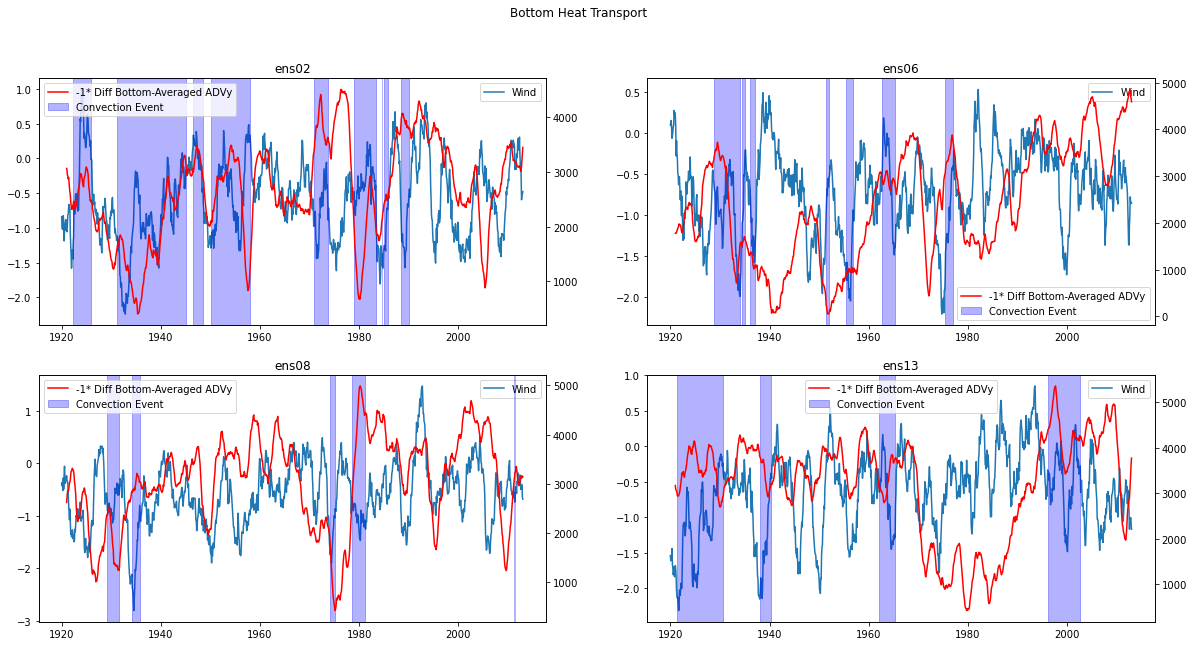

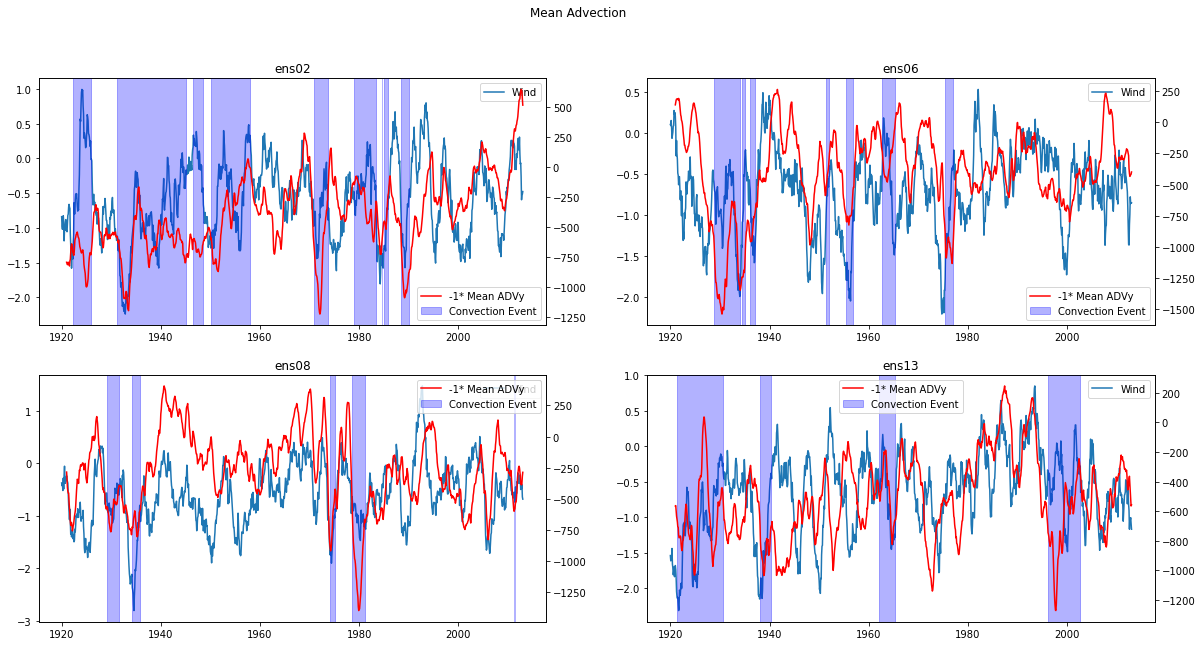

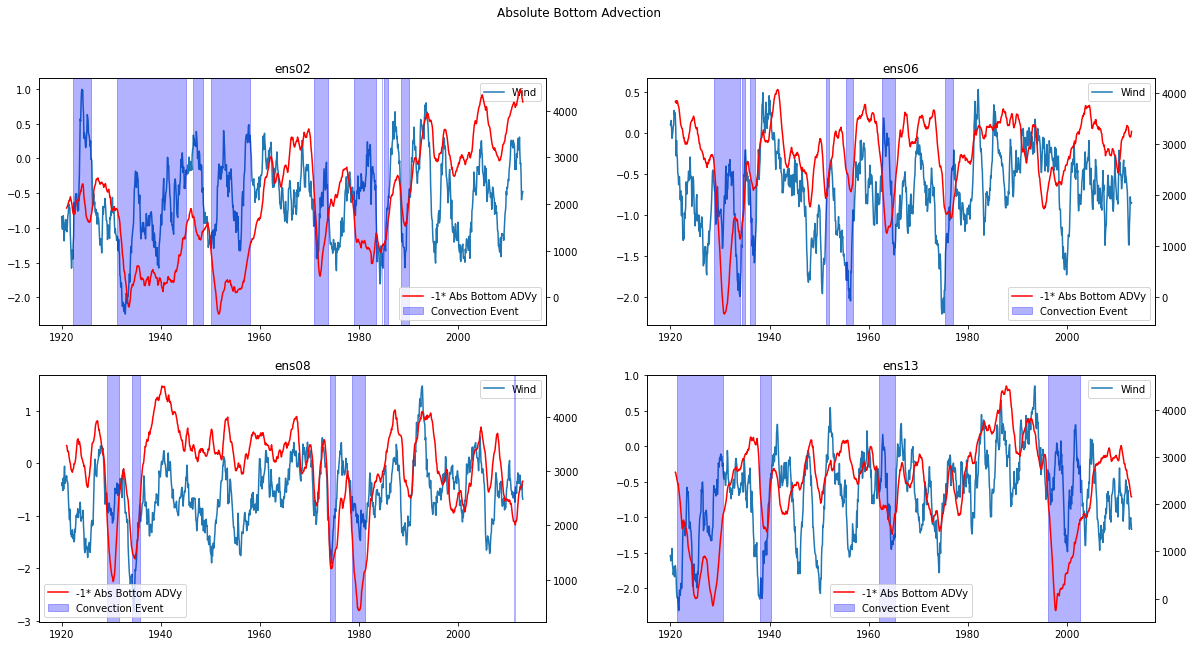

In [57]:
choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']


plt.figure(figsize=(20,10))

plt.suptitle('Bottom Heat Transport')
ens_list=['ens02', 'ens06', 'ens08', 'ens13']
num_list=[1, 5, 7, 12]
name='PITE'

for i, ens in enumerate(ens_list):
    ax=plt.subplot(2,2,i+1)
    #ax.plot(total['amundsen_shelf_ohc_below_0m'][ens]['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'][ens].rolling(24, center=True).mean()['1920':'2013'], label='OHC')  
    ax.plot(total['amundsen_shelf_break_uwind_avg'][ens]['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'][ens].rolling(24, center=True).mean()['1920':'2013'], label='Wind')
    plt.legend()
    
    #ax2=ax.twinx()
    #ax2.plot(total['amundsen_shelf_ohc_below_0m'][ens]['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'][ens].rolling(24, center=True).mean()['1920':'2013'], label='OHC', c='g')
    
    ax1=ax.twinx()
    
    if name in ['PITE', 'Burke', 'BRW']:
        plt.plot(time, (-1*(flowb[name]['ADVy_TH'].sel(ens=i)-flow[name]['ADVy_TH'].sel(ens=num_list[i])).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time')), label='-1* Diff Bottom-Averaged ADVy', c='r')
    else:
        plt.plot(time, (flowb[name]['ADVy_TH'].sel(ens=i)-flow[name]['ADVy_TH']).sel(ens=num_list[i]).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time'), label='Diff Bottom-Averaged ADVy', c='r')
    
    k=0
    #for i in range(1,21):
    sel=convection[ens]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)
    plt.title(ens)
    plt.legend()
        
        
plt.figure(figsize=(20,10))
plt.suptitle('Mean Advection')


for i, ens in enumerate(ens_list):
    ax=plt.subplot(2,2,i+1)
    
    ax.plot(total['amundsen_shelf_break_uwind_avg'][ens]['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'][ens].rolling(24, center=True).mean()['1920':'2013'], label='Wind')
    plt.legend()
    
    #ax2=ax.twinx()
    #ax2.plot(total['amundsen_shelf_ohc_below_0m'][ens]['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'][ens].rolling(24, center=True).mean()['1920':'2013'], label='OHC', c='g')
    
    ax1=ax.twinx()
    
    if name in ['PITE', 'Burke', 'BRW']:
        plt.plot(time, (-1*flow[name]['ADVy_TH']).sel(ens=num_list[i]).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time'), label='-1* Mean ADVy', c='r')
    else:
        plt.plot(time, flow[name]['ADVy_TH'].sel(ens=num_list[i]).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time'), label='Mean ADVy', c='r')
    
    k=0
    #for i in range(1,21):
    sel=convection[ens]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)
    plt.title(ens)
    plt.legend()

    
plt.figure(figsize=(20,10))
plt.suptitle('Absolute Bottom Advection')


for i, ens in enumerate(ens_list):
    ax=plt.subplot(2,2,i+1)
    
    ax.plot(total['amundsen_shelf_break_uwind_avg'][ens]['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'][ens].rolling(24, center=True).mean()['1920':'2013'], label='Wind')
    plt.legend()
    
    #ax2=ax.twinx()
    #ax2.plot(total['amundsen_shelf_ohc_below_0m'][ens]['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'][ens].rolling(24, center=True).mean()['1920':'2013'], label='OHC', c='g')
    
    ax1=ax.twinx()
    
    if name in ['PITE', 'Burke', 'BRW']:
        plt.plot(time, (-1*flowb[name]['ADVy_TH']).sel(ens=num_list[i]).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time'), label='-1* Abs Bottom ADVy', c='r')
    else:
        plt.plot(time, flowb[name]['ADVy_TH'].sel(ens=num_list[i]).sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(dim='time'), label='Abs Bottom ADVy', c='r')
    
    k=0
    #for i in range(1,21):
    sel=convection[ens]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)
    plt.title(ens)
    plt.legend()

In [15]:
data

{'ADVy_TH': <xarray.Dataset>
 Dimensions:  (time: 1488, YG: 384, XC: 600, ens: 20)
 Coordinates:
   * time     (time) object 1890-02-01 00:00:00 ... 2014-01-01 00:00:00
   * YG       (YG) float32 -75.65 -75.63 -75.6 -75.58 ... -62.51 -62.46 -62.41
   * XC       (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0
 Dimensions without coordinates: ens
 Data variables:
     ADVy_TH  (ens, time, YG, XC) float64 nan nan nan ... -1.606e+04 -1.456e+04,
 'ADVy_THB': <xarray.Dataset>
 Dimensions:  (time: 1488, YG: 384, XC: 600, ens: 13)
 Coordinates:
   * time     (time) object 1890-02-01 00:00:00 ... 2014-01-01 00:00:00
   * YG       (YG) float32 -75.65 -75.63 -75.6 -75.58 ... -62.51 -62.46 -62.41
   * XC       (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0
 Dimensions without coordinates: ens
 Data variables:
     ADVy_TH  (ens, time, YG, XC) float64 nan nan nan ... -2.619e+03 -1.181e+03}